##What are Convolutions?

En el próximo laboratorio, explorará cómo mejorar nuestro clasificador usando **Convoluciones**. Pero, ¿qué son las convoluciones? En este laboratorio explorarás qué son y cómo funcionan, y en el siguiente laboratorio verás cómo usarlos en tu red neuronal.

Junto con las convoluciones, usará algo llamado 'Pooling', que comprime su imagen, enfatizando aún más las características. También verá cómo funciona esta operación en este laboratorio.

##Limitations of the previous DNN
En el último laboratorio vimos cómo entrenar un clasificador de imágenes para artículos de moda usando el conjunto de datos Fashion MNIST. Esto le dio un clasificador bastante preciso, pero había una restricción obvia: las imágenes eran 28x28, escala de grises y el elemento estaba centrado en la imagen.

Por ejemplo, aquí hay un par de imágenes en Fashion MNIST
![Picture of a sweater and a boot](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

El DNN que creó simplemente aprendió de los píxeles en bruto lo que formaba un suéter y lo que constituía una bota en este contexto. ¿Pero considere cómo podría clasificar esta imagen?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28x28 greyscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the features that make up what a boot is.

That's where Convolutions are very powerful. A convolution is a filter that passes over an image, processing it, and extracting features that show a commonolatity in the image. In this lab you'll see how they work, but processing an image to see if you can extract features from it!

Si bien está claro que hay botas en esta imagen, el clasificador fallará por varias razones.
- Primero, por supuesto, no se trata de una escala de grises de 28x28.
- Segundo, lo que es más importante, el clasificador se entrenó en los píxeles sin formato de una bota orientada hacia la izquierda, y no en las características que componen lo que es una bota. 

Ahí es donde las convoluciones son muy poderosas. Una convolución es un filtro que pasa sobre una imagen, la procesa y extrae características que muestran una característica común en la imagen. En este laboratorio verás cómo funcionan,  !procesando una imagen para ver si puedes extraer características de ella!




## Convolution
Generating convolutions is very simple -- you simply scan every pixel in the image and then look at it's neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter. 

Generar convoluciones es muy simple: simplemente escaneamos cada píxel de la imagen y los píxeles vecinos. Multiplicamos los valores de estos píxeles por los pesos equivalentes en un filtro.

Por ejemplo, considere esto:

![Convolution on image](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig1.png)


En este caso se especifica una convolución 3x3. 

El valor de píxel actual es 192, pero puede calcular el nuevo mirando los valores vecinos, multiplicándolos por los valores especificados en el filtro y haciendo que el nuevo valor de píxel sea la cantidad final.

![texto alternativo](https://lh3.googleusercontent.com/proxy/uqAUvO240ccxQCmNQrvGAZXPcVA3HCgx93kEFDSdHxCmLtbfr_bBAh8foXwjaAxwtFVZ_i_KzaBB5N-h2b_AmiL2mYocILOAC5aYYbW7ye4enTHuV-sEgUrRSJlV6L04uFX8)


Exploremos cómo funcionan las convoluciones creando una convolución básica en una imagen de escala de grises 2D. 

Comencemos importando algunas bibliotecas de Python y una imagen con la cual trabajar.

In [0]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

A continuación, podemos usar la biblioteca pyplot para dibujar la imagen para que sepamos cómo se ve.

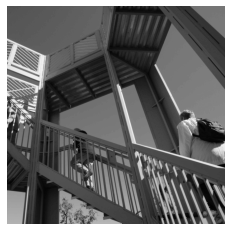

Image shape:(512, 512)


In [9]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.axis('off')
plt.imshow(i)
plt.show()
print('Image shape:'+str(i.shape))

Podemos ver que esta es una imagen de una escalera. Aquí hay muchas características con las que podemos *jugar* para ver si podemos aislarlas, por ejemplo, hay líneas verticales fuertes. 

La imagen se almacena como una matriz, por lo que podemos crear la imagen transformada simplemente copiando esa matriz. También obtengamos las dimensiones de la imagen para poder recorrerla más tarde.

In [0]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Ahora podemos crear un filtro como una matriz de 3x3. 

Nuestro filtro será capaz de detectar bordes verticales. 

Si todos los dígitos en el filtro no suman 1, debemos normalizar el resultado final

In [0]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight  = 1

Ahora creemos una convolución. Vamos a iterar sobre la imagen, dejando un margen de 1 píxel, y multiplicaremos cada uno de los vecinos del píxel actual por el valor definido en el filtro. es decir, el vecino actual del píxel por encima y hacia la izquierda se multiplicará por el elemento superior izquierdo en el filtro, etc. 

Finalmente cargaremos el nuevo valor en la imagen transformada.

In [0]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Ahora podemos mostrar la imagen para ver el efecto de la convolución!

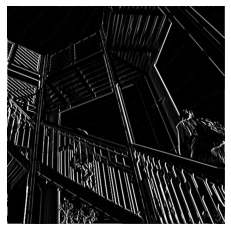

Image shape:(512, 512)


In [18]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()   
print('Image shape:'+str(i_transformed.shape))

Consideremos los siguientes valores de filtros y su impacto en la imagen. 

Usar -1,0,1,  -2,0,2, -1,0,1 nos da un conjunto muy fuerte de líneas verticales:

![Detecting vertical lines filter](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig2.png)

Usar -1,-2,-1,  0,0,0, 1,2,1 nos da líneas horizontales:

![Detecting horizontal lines](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig3.png)

## Pooling
Además de utilizar convoluciones, la agrupación/**pooling** nos ayuda mucho a detectar características. El objetivo es reducir la cantidad total de información en una imagen, mientras se mantienen las características relevantes. 

Hay varios tipos diferentes de Pooling, pero para esta práctica de laboratorio usaremos una denominada MAX Pooling.  La idea aquí es iterar sobre la imagen y mirar el píxel y sus vecinos inmediatos. Tome el más grande (de ahí el nombre MAX pooling) de ellos y mantenerlo en la nueva imagen. Por lo tanto, la nueva imagen será 1/4 del tamaño de la anterior, con las dimensiones en X e Y reducidas a la mitad por este proceso. ¡Verás que las características se mantienen a pesar de esta compresión!

![Max Pooling](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig4.png)

Este código ejecuta una agrupación (2, 2). ¡Ejecútelo para ver la salida y verá que mientras la imagen es 1/4 del tamaño del original, se mantienen las características extraídas!



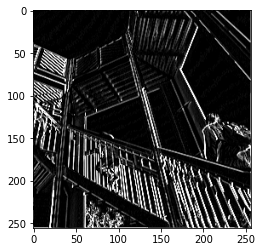

Image shape:(256, 256)


In [21]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()
print('Image shape:'+str(newImage.shape))

En el próximo laboratorio, verá cómo agregar convoluciones a su red neuronal Fashion MNIST para que sea más eficiente, porque se clasificará en función de las características y no en píxeles sin formato.